In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PointTracking_v2 import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

from scipy.cluster.vq import vq

In [ ]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 100000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 0.5, dst = False, vortex = True)

Total Imag Time:  1.3434674739837646
kmax:  4.0212385965949355
T:  4.042589962686201


In [3]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)

In [4]:
print(np.shape(g.snaps))


(401, 128, 128)


In [5]:
# look at individual frames and see how the tracker detects the vortices vs. the circulation plot
s = -1
vortex, antiv, circulation = pt.detectVortices(tracker, g.snaps[s])


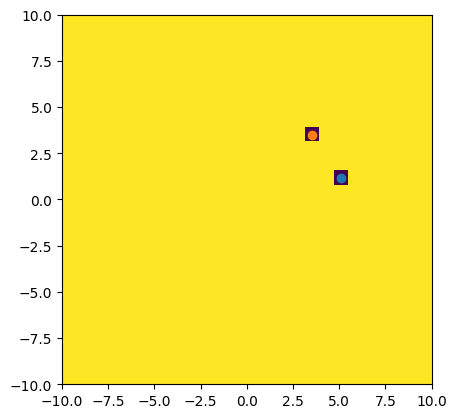

In [6]:
plt.figure() 
plt.imshow(circulation, extent = [-g.L/2, g.L/2, -g.L/2, g.L/2], origin = 'lower') 
for i in range(len(antiv)): 
    plt.scatter(*antiv[i]-g.L/2)

plt.xlim(-10,10)
plt.ylim(-10,10)
# also maybe track the vortices themselves with the trackers instead of the circulation... why is the circulation at a distance = 5 away from each other? 
plt.show() 

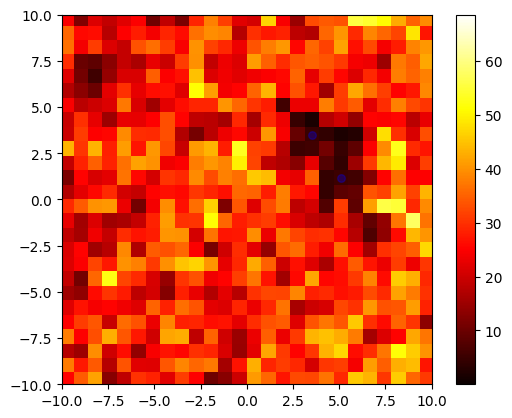

In [7]:
plt.figure() 
plt.imshow(np.abs(g.snaps[s])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], origin = 'lower', cmap = plt.cm.hot)
plt.colorbar() 
plt.scatter(*antiv[0]-g.L/2, s = 30, color = 'blue', alpha = 0.3)
plt.scatter(*antiv[1]-g.L/2, s = 30, color = 'blue', alpha = 0.3)

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show() 

In [104]:
# v_traj, antiv_traj, circ_array = pt.labelVortices(tracker, getCirc = True) 
# v_traj = np.array(v_traj) 
# antiv_traj = np.array(antiv_traj) 

0
1


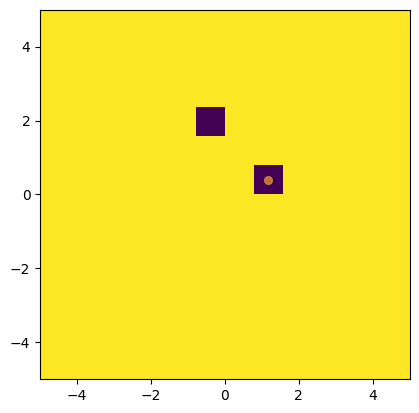

In [126]:
# s = 84
# vortex, antiv, circulation = pt.detectVortices(tracker, g.snaps[s])
# plt.figure() 
# plt.imshow(circulation, extent = [-g.L/2, g.L/2, -g.L/2, g.L/2], origin = 'lower') 
# for i in range(len(antiv_traj)): 
#     print(i)
#     plt.scatter(*antiv_traj[i][s]-g.L/2, s = 30, alpha = 0.7)
# plt.xlim(-5,5)
# plt.ylim(-5,5)
# plt.show() 

In [11]:
def labelVortices(self, getCirc = False): 
    # loop through each of the frames of the simulation 
    circ = []
    for i in range(1,len(self.psi_snaps)//4):  
        # find the vortex and anti-vortex positions           
        vortex_positions, anti_vortex_positions, circulation = self.detectVortices(self.psi_snaps[i]) # this can be the features
         
        
        # find active point coordinates 
        active_vortex_coors, active_antivortex_coors = self.getVAntiVInfo() # this can be the codebook 
        print(active_antivortex_coors)
        if i%10 == 0: 
            print(i)
            plt.figure() 
            plt.imshow(circulation, extent = [-g.L/2, g.L/2, -g.L/2, g.L/2], origin = 'lower')
            for i in range(len(anti_vortex_positions)): 
                plt.scatter(*anti_vortex_positions[i]-self.L/2, s = 30, alpha = 0.3)
            for j in range(len(active_antivortex_coors)): 
                plt.scatter(*np.array(active_antivortex_coors)[j]-self.L/2, s = 30, alpha = 0.5, color = 'black')
            plt.show()

        if len(active_vortex_coors) > 0 and len(vortex_positions)>0: 
            vortices_closest_index, distances_v = vq(active_vortex_coors, vortex_positions)
            # merge options where there are multiple of the same index: is this causing the index error issue?? 



            # for now, assume all unique indices 
            for i in range(len(active_vortex_coors)): 
                index_of_match = vortices_closest_index[i] # get the ith index 
                detected_coordinate_match = vortex_positions[index_of_match]
                self.vortices[i].addCoor(*detected_coordinate_match)

                #print("Vortex Trajectory: ", self.vortices[i].getTrajectory())

            
        if len(active_antivortex_coors)>0 and len(anti_vortex_positions) > 0 : 
            antivortices_closest_index, distances_av = vq(active_antivortex_coors, anti_vortex_positions) 

            for i in range(len(active_antivortex_coors)): 
                index_of_match = antivortices_closest_index[i] 
                print("Index of Match: ", index_of_match)
                detected_coordinate_match = anti_vortex_positions[index_of_match]
                # the following line might be the issue - finding and adding new vortices might cause the vortices to shift indices? 
                self.antivortices[i].addCoor(*detected_coordinate_match)
                #print("AntiVortex Trajectory: ", self.antivortices[i].getTrajectory())
        if getCirc: 
            circ.append(circulation)

        #print("")
    v_traj = [] 
    av_traj = [] 
    for i in range(len(self.vortices)): 
        v_traj.append(self.vortices[i].getTrajectory()) 
    for j in range(len(self.antivortices)): 
        av_traj.append(self.antivortices[j].getTrajectory())
    if getCirc: 
        return v_traj, av_traj, circ
    
    return v_traj, av_traj

In [10]:
for i in range(len(tracker.antivortices)): 
    print(tracker.antivortices[i].getCoors())

(24.609375, 23.828125)
(25.390625, 25.390625)


[(24.609375, 23.828125), (25.390625, 25.390625)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(23.828125, 24.609375), (23.828125, 24.609375)]
Index of Match:  0
Index of Match:  0
[(23.828125, 24.609375), (23.828125, 24.609375)]
Index of Match:  0
Index of Match:  0
[(23.828125, 24.609375), (23.828125, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
10


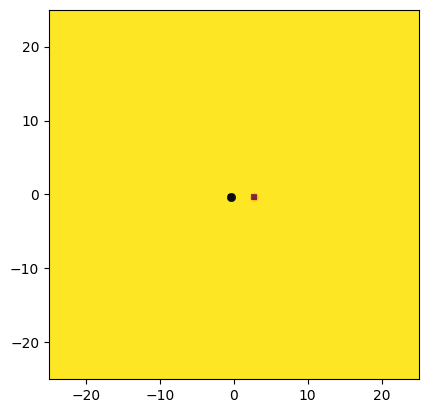

Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
20


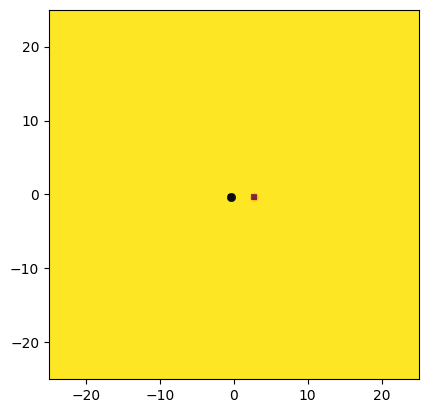

Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
30


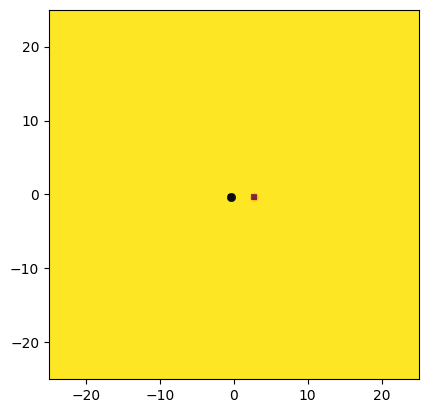

Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 24.609375), (24.609375, 24.609375)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
40


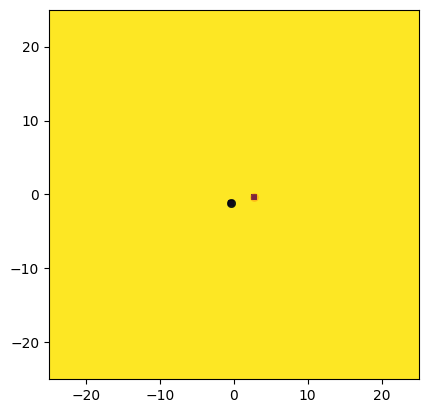

Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
50


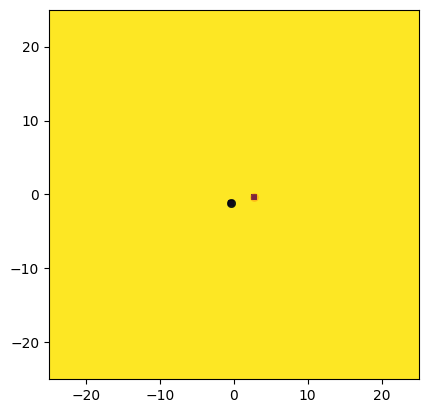

Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  1
Index of Match:  1
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  1
Index of Match:  1
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
60


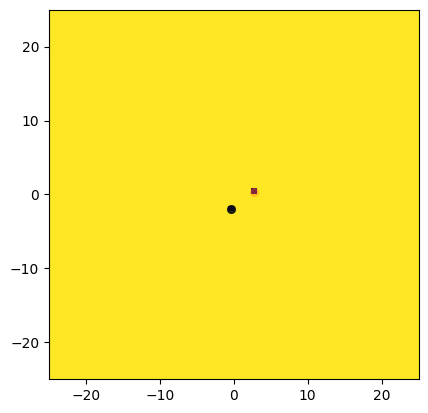

Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 22.265625), (24.609375, 22.265625)]
Index of Match:  0
Index of Match:  0
[(23.828125, 22.265625), (23.828125, 22.265625)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
70


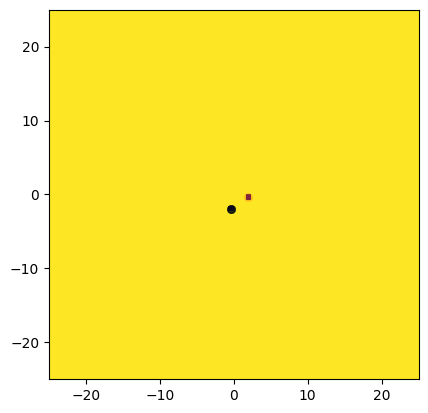

Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  1
Index of Match:  1
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
80


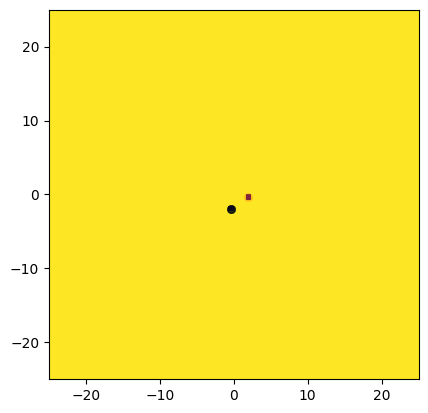

Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0
[(23.828125, 23.046875), (23.828125, 23.046875)]
Index of Match:  0
Index of Match:  0
[(23.828125, 23.046875), (23.828125, 23.046875)]
Index of Match:  0
Index of Match:  0
[(23.828125, 23.828125), (23.828125, 23.828125)]
Index of Match:  0
Index of Match:  0
[(23.828125, 23.828125), (23.828125, 23.828125)]
90


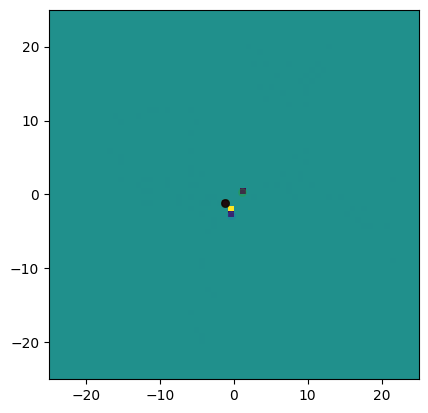

Index of Match:  1
Index of Match:  1
[(23.828125, 23.828125), (23.828125, 23.828125)]
Index of Match:  1
Index of Match:  1
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  1
Index of Match:  1
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  1
Index of Match:  1
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.828125), (24.609375, 23.828125)]
Index of Match:  0
Index of Match:  0
[(24.609375, 23.046875), (24.609375, 23.046875)]
Index of Match:  0
Index of Match:  0


([],
 [array([[24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [23.828125, 24.609375],
         [23.828125, 24.609375],
         [23.828125, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
         [24.609375, 24.609375],
     

In [12]:
labelVortices(tracker)
# the directory of active points is copied! 

In [137]:
print(len(g.snaps)//4)

100
